In [1]:

# VAE LTSM CODE WAS ADAPTED FROM: 
# https://stackoverflow.com/questions/63987125/keras-lstm-vae-variational-autoencoder-for-time-series-anamoly-detection
# NN VAE CODE WAS ADAPTED FROM: 
# https://blog.keras.io/building-autoencoders-in-keras.html

import joblib, argparse, uuid, sigopt
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit import DataStructs

from sklearn import preprocessing
from utils.sklearn_utils import *

import selfies as sf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers

import seaborn as sns

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)    

/home/santiagovargas/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/santiagovargas/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/santiagovargas/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
# Used to convert molecules to string representation

from utils.selfies_util import selfies,smile_to_hot, \
multiple_smile_to_hot, selfies_to_hot, multiple_selfies_to_hot,\
get_selfie_and_smiles_encodings_for_dataset, compare_equality, tanimoto_dist

In [3]:
# previously implemented extraction script from a database of quinones we gathered
# names are strings in the smiles format
names, ret, homo, homo1, diff = selfies()
print(len(names))

..........converting xyz to smiles.......
 3008 /61493

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 9876 /61493

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 17277 /61493

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 24394 /61493

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 31477 /61493

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 38250 /61493

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 45053 /61493

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 51811 /61493

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 56846 /61493

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 184 /6367893

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 4561 /63678

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 8624 /63678

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 12631 /63678

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 16461 /63678

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 2402 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 6492 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 10159 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 17940 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 21686 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 25525 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 29528 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 33394 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 40286 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 44056 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 49093 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 52706 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 56607 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 60485 / 61182

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 61178 /6118058183
58183
58183
58183
58183
58183


In [4]:
# convert from smiles to selfies (different formats)
selfies_list, selfies_alphabet, largest_selfies_len,\
smiles_list, smiles_alphabet, largest_smiles_len\
= get_selfie_and_smiles_encodings_for_dataset(names)

data = multiple_selfies_to_hot(selfies_list, largest_selfies_len,\
                                       selfies_alphabet)

max_mol_len = data.shape[1]
alpha_len = data.shape[2]
len_alphabet_mol = alpha_len * max_mol_len
# encoding alphabet
# sample len 

--> Translating SMILES to SELFIES...
Finished translating SMILES to SELFIES.


# VAE NN

In [6]:
latent_dim = 64
input_size = data.shape[1] * data.shape[2]

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return (z_mean + tf.exp(0.5 * z_log_var) * epsilon)


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            
            reconstruction_loss = keras.losses.mse(data, reconstruction)
            #reconstruction_loss = keras.losses.binary_crossentropy(data, reconstruction)
            
            kl_loss =  (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = -0.5 * tf.reduce_mean(kl_loss)
            beta = 1 * latent_dim / input_size
            total_loss = reconstruction_loss +  beta * kl_loss
        
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    


In [9]:
## VAE
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

latent_dim = 32
# Create data
data_reshape = data.reshape(data.shape[0], data.shape[1], data.shape[2])
x_train = data_reshape[0:int(data.shape[0] * 0.8)]
x_test = data_reshape[int(data.shape[0] * 0.8):-1]

# Create encoder
inputs = keras.Input(shape=(data.shape[1] * data.shape[2]))
x = layers.Dense(256, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)

# Sampling Layers
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")

# Create Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
decoded = layers.Dense(64, activation='relu')(latent_inputs)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(data.shape[1] * data.shape[2], activation='sigmoid')(decoded)
decoder = keras.Model(latent_inputs, decoded, name="decoder")


In [10]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1800)]       0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 256)          461056      input_4[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 64)           16448       dense_7[0][0]                    
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 32)           2080        dense_8[0][0]                    
____________________________________________________________________________________________

In [11]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_11 (Dense)             (None, 1800)              462600    
Total params: 481,352
Trainable params: 481,352
Non-trainable params: 0
_________________________________________________________________


In [12]:
   
data_reshape = data.reshape(data.shape[0], data.shape[1] * data.shape[2],)
x_train = data_reshape[0:int(data.shape[0] * 0.8)]
x_test = data_reshape[int(data.shape[0] * 0.8):-1]

vae = VAE(encoder, decoder)
vae.compile(keras.optimizers.Adam(learning_rate=0.001))
history = vae.fit(x_train, epochs=75)

Epoch 1/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0271 - reconstruction_loss: 0.0175 - kl_loss: 0.0711
Epoch 2/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0154 - reconstruction_loss: 0.0127 - kl_loss: 0.1247
Epoch 3/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0138 - reconstruction_loss: 0.0108 - kl_loss: 0.1564
Epoch 4/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0129 - reconstruction_loss: 0.0096 - kl_loss: 0.1778
Epoch 5/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0124 - reconstruction_loss: 0.0089 - kl_loss: 0.1892
Epoch 6/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0120 - reconstruction_loss: 0.0085 - kl_loss: 0.1978
Epoch 7/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0118 - reconstruction_loss: 0.0081 - kl_loss: 0.2047
Epoch 8/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0116 

1455/1455 [==============================] - 2s 1ms/step - loss: 0.0100 - reconstruction_loss: 0.0053 - kl_loss: 0.2659
Epoch 64/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0100 - reconstruction_loss: 0.0053 - kl_loss: 0.2665
Epoch 65/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0100 - reconstruction_loss: 0.0053 - kl_loss: 0.2666
Epoch 66/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0100 - reconstruction_loss: 0.0053 - kl_loss: 0.2667
Epoch 67/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0100 - reconstruction_loss: 0.0053 - kl_loss: 0.2674
Epoch 68/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0100 - reconstruction_loss: 0.0052 - kl_loss: 0.2683
Epoch 69/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0100 - reconstruction_loss: 0.0052 - kl_loss: 0.2675
Epoch 70/75
1455/1455 [==============================] - 2s 1ms/step - loss: 0.0100 - re

Text(0.5, 1.0, 'NN VAE Training Loss')

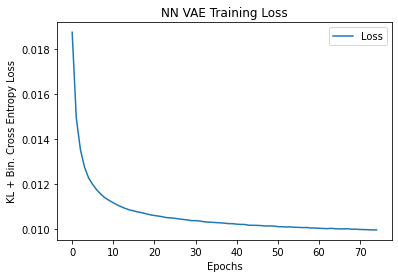

In [13]:
import matplotlib.pyplot as plt 
plt.plot(history.history["loss"], label = "Loss")
#plt.plot(history.history["val_loss"], label= "Val. Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("KL + Bin. Cross Entropy Loss")
plt.title("NN VAE Training Loss")

In [11]:
#if self.use_batch_norm:
#    x = layers.BatchNormalization()(x)
#if self.use_dropout:
#    x = Dropout(rate = 0.25)(x)

In [14]:
test = x_train.reshape(x_train.shape[0], data.shape[1] * data.shape[2])
code_decode = vae.decoder.predict(vae.encoder.predict(test))

print(np.shape(code_decode))
print(np.shape(test))

compare_equality(
    test, 
    code_decode, 
    (data.shape[1], data.shape[2]), 
    selfies_alphabet)

(46546, 1800)
(46546, 1800)
Autoencoded Smiles: O=C1C=C(Br)C(=O)C(NBr)=C1
True Smiles: COC(=O)C1=C(Br)C(=O)C=CC1=O
Percent Reconstructed Molescules: 0.0052850943153009925


Text(0.5, 0, 'Similarity (Higher is Better)')

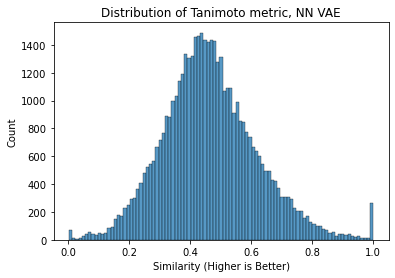

In [15]:
dist = tanimoto_dist(
    test, 
    code_decode, 
    (data.shape[1], data.shape[2]), 
    selfies_alphabet)
sns.histplot(dist)
plt.title("Distribution of Tanimoto metric, NN VAE")
plt.ylabel("Count")
plt.xlabel("Similarity (Higher is Better)")

# vae lstm

In [22]:
data_reshape = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
x_train = data[0:int(data.shape[0] * 0.8)]
x_test = data[int(data.shape[0] * 0.8):-1]

timesteps = data.shape[1]
input_dim = data.shape[2]
latent_dim = 64
#inter_dim = 100
#print(timesteps, input_dim)

def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0] 
    epsilon = tf.keras.backend.random_normal(
        shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss2(input_x, decoder1, z_log_sigma, z_mean):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    recon = keras.losses.mse(input_x, decoder1)
    kl = 0.5 * tf.reduce_mean(tf.exp(z_log_sigma) + tf.square(z_mean) - 1. - z_log_sigma)
    beta = 1 * latent_dim / input_size
    return recon + kl * beta



# timesteps, features
input_x = keras.Input(shape=(timesteps, input_dim))
#intermediate dimension 
h = layers.LSTM(128, activation='relu', return_sequences=True)(input_x)
h = layers.LSTM(128, activation='relu')(h)

#z_layer
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)
z = layers.Lambda(sampling, name = "encode")([z_mean, z_log_sigma])

# Reconstruction decoder
decoder1 = layers.RepeatVector(timesteps)(z)
decoder1 = layers.LSTM(128, activation='relu', return_sequences=True)(decoder1)
decoder1 = layers.LSTM(128, activation='relu', return_sequences=True)(decoder1)
decoder1 = layers.TimeDistributed(layers.Dense(input_dim))(decoder1)

m = keras.Model(input_x, decoder1)
m.add_loss(vae_loss2(input_x, decoder1, z_log_sigma, z_mean)) 

#reconstruction_loss = keras.losses.mse(input_x, decoder1)
#reconstruction_loss = keras.losses.binary_crossentropy(data, reconstruction)
#kl_loss =  (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_sigma))
#kl_loss = -0.5 * tf.reduce_mean(kl_loss)
#beta = 0.1 * latent_dim / input_size
#total_loss = reconstruction_loss +  beta * kl_loss
#m.add_loss(total_loss)

m.compile(optimizer='adam')
m.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 60, 30)]     0                                            
__________________________________________________________________________________________________
lstm_8 (LSTM)                   (None, 60, 128)      81408       input_9[0][0]                    
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 128)          131584      lstm_8[0][0]                     
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 64)           8256        lstm_9[0][0]                     
_______________________________________________________________________________________

In [ ]:
m.summary()
history = m.fit(x_train, x_train, epochs=5, 
                   validation_data=(x_test, x_test))

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 60, 30)]     0                                            
__________________________________________________________________________________________________
lstm_8 (LSTM)                   (None, 60, 128)      81408       input_9[0][0]                    
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 128)          131584      lstm_8[0][0]                     
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 64)           8256        lstm_9[0][0]                     
_______________________________________________________________________________________

Text(0.5, 1.0, 'LTSM-VAE Training Loss')

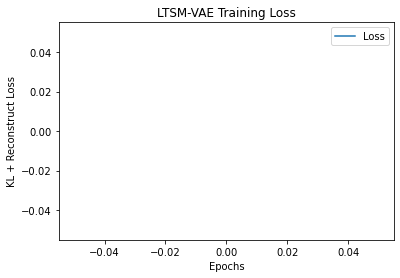

In [21]:
import matplotlib.pyplot as plt 
plt.plot(history.history["loss"], label = "Loss")
#plt.plot(history.history["val_loss"], label= "Val. Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("KL + Reconstruct Loss")
plt.title("LTSM-VAE Training Loss")

In [19]:
test = x_train.reshape(x_train.shape[0], data.shape[1],  data.shape[2])
code_decode = m.predict(test)

print(np.shape(code_decode))
print(np.shape(test))

compare_equality(
    test, 
    code_decode, 
    (data.shape[1], data.shape[2]), 
    selfies_alphabet)


(46546, 60, 30)
(46546, 60, 30)
Autoencoded Smiles: C=C(CC=C(C=O)OC)C(C)O
True Smiles: COC(=O)C1=C(Br)C(=O)C=CC1=O
Percent Reconstructed Molescules: 0.002363253555622395


Text(0.5, 0, 'Similarity (Higher is Better)')

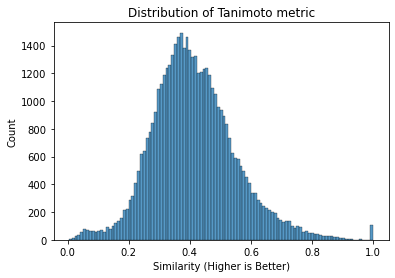

In [20]:
dist = tanimoto_dist(
    test, 
    code_decode, 
    (data.shape[1], data.shape[2]), 
    selfies_alphabet)
sns.histplot(dist)
plt.title("Distribution of Tanimoto metric")
plt.ylabel("Count")
plt.xlabel("Similarity (Higher is Better)")

# VAE - RNN

In [95]:
data_reshape = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
x_train = data[0:int(data.shape[0] * 0.8)]
x_test = data[int(data.shape[0] * 0.8):-1]

timesteps = data.shape[1]
input_dim = data.shape[2]
latent_dim = 128
inter_dim = 32


def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0] 
    epsilon = tf.keras.backend.random_normal(
        shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss2(input_x, decoder1, z_log_sigma, z_mean):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    recon = keras.losses.mse(input_x, decoder1)
    kl = 0.5 * tf.reduce_mean(tf.exp(z_log_sigma) + tf.square(z_mean) - 1. - z_log_sigma)
    return recon + kl

reconstruction_loss = keras.losses.mse(input_x, decoder1)
#reconstruction_loss = keras.losses.binary_crossentropy(data, reconstruction)
kl_loss =  (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_sigma))
kl_loss = -0.5 * tf.reduce_mean(kl_loss)
beta = 0.1 * latent_dim / input_size
total_loss = reconstruction_loss +  beta * kl_loss

# timesteps, features
input_x = keras.Input(shape=(timesteps, input_dim))
#intermediate dimension 
h = layers.RNN(inter_dim, activation='relu')(input_x)

#z_layer
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)
z = layers.Lambda(sampling, name = "encode")([z_mean, z_log_sigma])

decoder1 = layers.RepeatVector(timesteps)(z)
decoder1 = layers.RNN(inter_dim, activation='relu', return_sequences=True)(decoder1)
decoder1 = layers.TimeDistributed(layers.Dense(input_dim))(decoder1)

m = keras.Model(input_x, decoder1)
#m.add_loss(total_loss) 
m.add_loss(vae_loss2(input_x, decoder1, z_log_sigma, z_mean)) 
m.compile(optimizer='adam')
m.summary()

ValueError: Dimensions must be equal, but are 32 and 256 for '{{node Sub_44}} = Sub[T=DT_FLOAT](AddV2_27, Square_22)' with input shapes: [?,32], [?,256].